In [1]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..')
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
import matplotlib.pyplot as plt

# Import self-made modules
from project1_code.linear_model import LinearModel
from project1_code.make_and_prepare_data import FrankeFunction, create_design_matrix
from project1_code.model_selection import R2, MSE, cross_validation

# Import plotting functions
from project1_code.plotting import plot_mse_per_poldegree, plot_R2_per_poldegree

In [8]:
# Choose hyperparameters for model
pol_degree = 5
data_size = 600
test_size = 0.2
error_std = 0
save_fig = False

In [9]:
# Make data
np.random.seed(5)

x = np.random.uniform(0, 1, data_size)
y = np.random.uniform(0, 1, data_size)

z = FrankeFunction(x, y) + np.random.normal(scale = error_std, size = data_size)

In [11]:
# Define empty list in which to store the MSE and R2 errors
mses = []
mses_train = []
r2s = []
r2s_train = []
mses_train_ridge = []
mses_test_ridge = []
mse_train_sk = []
mse_test_sk = []


# Train and test model for different polynomial derees
for i in range(1, pol_degree+1):
    X = create_design_matrix(x, y, i)
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = test_size, random_state=1)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 
    
    lr_ridge = LinearModel(regr_type='ridge', lamb=0.6)
    lr_ridge.fit(X_train, z_train)
    
    z_pred_test_ridge = lr_ridge.predict(X_test)
    z_pred_train_ridge = lr_ridge.predict(X_train)
    
    # Calculate errors for test set
    mses_train_ridge.append(MSE(z_train, z_pred_train_ridge))
    mses_test_ridge.append(MSE(z_test, z_pred_test_ridge))
    
    lr_sk = Ridge(alpha=0.6)
    lr_sk.fit(X_train, z_train)
    print(lr_sk.intercept_, lr_sk.coef_)
    
    print(lr_ridge.coeffs)
    

1.0105687605825322 [-0.69169095 -0.50700145]
[ 1.00200961 -0.68389217 -0.5001547 ]
1.0894544168324425 [-0.63720711 -0.39371897 -0.74587995  0.67524456 -0.08897635]
[ 1.06555158 -0.58853658 -0.4188276  -0.70224603  0.64223945 -0.10987281]
1.0900105937130031 [-0.54876838 -0.76170851  0.37110086 -0.58671771  0.34130932 -0.14902717
 -0.37807637  0.56096697  0.07062166]
[ 1.06594431 -0.49975801 -0.78325201  0.36644324 -0.54248179  0.30141165
 -0.14350218 -0.39719428  0.56383937  0.06818964]
1.0746256669631438 [-0.41442248 -0.92747989 -0.16413949  0.68286714 -0.5189036   0.36975958
 -0.19005624 -0.10350285 -0.40292507  0.41460659 -0.08228054 -0.05855943
  0.37791991  0.03527026]
[ 1.04944698 -0.36036422 -0.9499152  -0.17634383  0.68717217 -0.46967652
  0.32633181 -0.20062537 -0.09068222 -0.4229882   0.4030599  -0.06627075
 -0.06839416  0.38805969  0.04003153]
1.0655954075097231 [-0.32909207 -0.92578567 -0.39506067  0.22473361  0.68338822 -0.52373737
  0.38357214 -0.1490771  -0.14071582  0.01

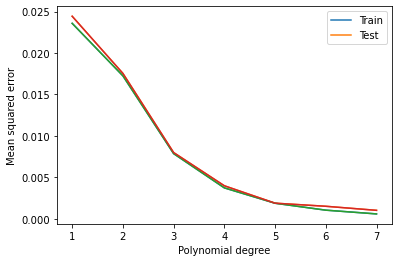

In [5]:
# Plot MSE
plot_mse_per_poldegree([mses_train, mses], ['Train', 'Test'], pol_degree=pol_degree, save_plot = save_fig, save_title = 'OLS_MSE_n=' + str(data_size) + ', sigma=' + str(error_std))
# Plot MSE
plt.plot(range(1, 8), mses_train_ridge)
plt.plot(range(1, 8), mses_test_ridge)

In [6]:
X = np.array([[0,2], [2, 1]])
X

array([[0, 2],
       [2, 1]])

In [7]:
X + np.identity(2)*0

array([[0., 2.],
       [2., 1.]])